In [83]:
!pip install nltk gensim sklearn tensorflow seaborn pandas

In [85]:
import pandas as pd
import seaborn as sns
import nltk

# Day 2 - Cleaning text data

In [10]:
import nltk
nltk.download('all-corpora') 
nltk.download('punkt') 

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloadin

True

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
file_path = "gdrive/MyDrive/dracula.txt"

file = open(file_path)
text = file.read()
file.close()

In [72]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tokens = word_tokenize(text)

stop_words = set(stopwords.words('english'))

tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]

tokens[:5]

['project', 'gutenberg', 'ebook', 'dracula', 'bram']

# Day 3 - Bag-of-words

## sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
        "The dog.",
        "The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

## keras

In [ ]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

# Day 4 - Word embeddings

In [69]:
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize
# define training data
sentences = []

for sentence in sent_tokenize(text):
  sentence_tokenized = []
  for token in word_tokenize(sentence):
    if token.lower() not in stop_words and token.isalpha():
      sentence_tokenized.append(token)
  sentences.append(sentence_tokenized)

# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['Dracula'])

Word2Vec(vocab=9748, size=100, alpha=0.025)
['Project', 'Gutenberg', 'eBook', 'Dracula', 'Bram', 'Stoker', 'use', 'anyone', 'anywhere', 'United', 'States', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'terms', 'License', 'included', 'online', 'located', 'check', 'laws', 'country', 'using', 'Title', 'Author', 'Release', 'Date', 'October', 'recently', 'updated', 'March', 'Language', 'English', 'Character', 'set', 'encoding', 'Produced', 'Chuck', 'Greif', 'Online', 'Distributed', 'Proofreading', 'Team', 'START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'DRACULA', 'Illustration', 'colophon', 'NEW', 'YORK', 'GROSSET', 'DUNLAP', 'Copyright', 'America', 'according', 'Act', 'Congress', 'rights', 'PRINTED', 'UNITED', 'STATES', 'COUNTRY', 'LIFE', 'PRESS', 'GARDEN', 'CITY', 'DEAR', 'FRIEND', 'Contents', 'CHAPTER', 'Jonathan', 'Harker', 'Journal', 'II', 'III', 'IV', 'Mina', 'VI', 'Murray', 'VII', 'Cutting', 'Dailygraph', 'August', 'VIII', 'IX', 'XI', 'Lu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


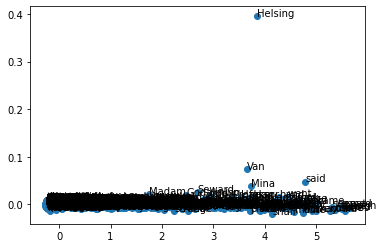

In [71]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# fit a 2D PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Most frequent words

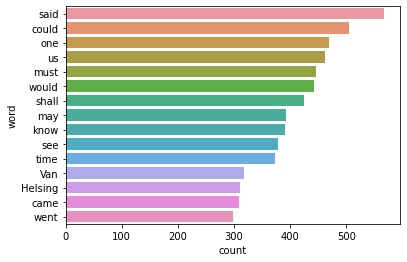

In [108]:
word_counts = [(word, model.wv.vocab[word].count) for word in model.wv.vocab]

word_counts.sort(key=lambda x: x[1], reverse=True)

df = pd.DataFrame(word_counts[:15], columns=["word", "count"])

sns.barplot(x="count", y="word", data=df)

# Day 5 - Learning embeddings

In [ ]:
# TODO